Stimulation devices
===================

To stimulate one class of retinal photoreceptor without changing the activation in others&mdash;which is to perform the method of silent substitution&mdash;requires a multiprimary stimulation device with at least as many primaries as there are photoreceptors on the retina. This generally means that [5 primaries are needed](./01_background.rst), although 4 primaries may suffice when working in the photopic range as rod photoreceptors become saturated and incapable of signalling above 300 cd/m$^2$ ([Aguiller and Stiles, 1954](https://doi.org/10.1080/713818657); [Adelson, 1982](https://doi.org/10.1016/0042-6989(82)90143-2); but see [Shapiro, 2002](https://iovs.arvojournals.org/article.aspx?articleid=2200107); [Kremers et al., 2009](https://doi.org/10.1007/s10633-008-9159-0)). The primaries should be independantly addressable, additive, and ideally stable over time with a linear gamma function. Peak wavelength and bandwidth of the primaries are key considerations that will ultimately define the gamut, and the light source will also need to be integrated into an optical system for stimulus delivery, which is usually either a Ganzfeld (e.g., [Martin et al., 2021](https://doi.org/10.3758/s13428-021-01759-3)) or maxwellian setup (e.g., [Cao et al., 2015](https://doi.org/10.1167/15.1.27)).

[Conus and Geiser (2020)](https://doi.org/10.3390/photonics7040121) reviewed the stimulation devices from a range of silent substitution studies and found that in most cases the device had 4 or 5 primaries and was built from scratch using LEDs, optical bench components, and microprocessors, such as Arduino, for pulse width modulation control of intensity. Only a few devices were commercially bought. Regardless of the device that is used, an external calibration with a spectrometer is necessary, and that is where *PySilSub* becomes useful. 


`pysilsub.device.StimulationDevice`
-----------------------------------

*PySilSub* offers generic support for multiprimary stimulation devices via its `StimulationDevice` class. A calibration file with spectral measurements is all that is required to get going. The following example is for a linear 4-primary device with 8-bit resolution depth, which is to say that the intensity of each LED is set with a number between 0 and 255. The full range of intensities was sampled in steps of 8, so there are 33 measurements for each LED. The first row of the calibration file contains the wavelength and a column to identify the primary and setting in question. We can load the CSV file with pandas. 

In [1]:
import pandas as pd

data = pd.read_csv(
    '../../data/RGBA_linear_artificial.csv', 
    index_col=['Primary', 'Setting']
)
data.columns = data.columns.astype('int64')
data.columns.name = 'Wavelength'
data

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        8        0.000053  0.000058  0.000052  0.000052  0.000046  0.000044   
        16       0.000107  0.000116  0.000104  0.000103  0.000093  0.000088   
        24       0.000160  0.000174  0.000157  0.000155  0.000139  0.000133   
        32       0.000213  0.000232  0.000209  0.000206  0.000186  0.000177   
...                   ...       ...       ...       ...       ...       ...   
3       224      0.003027  0.003555  0.003159  0.003563  0.002712  0.002951   
        232      0.003135  0.003682  0.003271  0.003690  0.002808  0.003056   
        240      0.003243  0.003809  0.003384  0.003817  0.002905  0.003162   
        248      0.003351  0.003936  0.003497  0.003944  0.003002  0.003267   
        256      0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        8        0.000050  0.000033  0.000052  0.000058  ...  0.000029   
        16       0.000100  0.000065  0.000105  0.000115  ...  0.000058   
        24       0.000150  0.000098  0.000157  0.000173  ...  0.000087   
        32       0.000200  0.000130  0.000209  0.000231  ...  0.000116   
...                   ...       ...       ...       ...  ...       ...   
3       224      0.002827  0.002159  0.003197  0.003623  ...  0.001990   
        232      0.002928  0.002237  0.003311  0.003753  ...  0.002061   
        240      0.003029  0.002314  0.003426  0.003882  ...  0.002132   
        248      0.003130  0.002391  0.003540  0.004011  ...  0.002203   
        256      0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength            772       773       774       775       776       777  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        8        0.000032  0.000032  0.000032  0.000035  0.000033  0.000033   
        16       0.000064  0.000064  0.000065  0.000069  0.000066  0.000065   
        24       0.000097  0.000096  0.000097  0.000104  0.000100  0.000098   
        32       0.000129  0.000128  0.000129  0.000138  0.000133  0.000131   
...                   ...       ...       ...       ...       ...       ...   
3       224      0.002227  0.002264  0.002182  0.002558  0.002361  0.002268   
        232      0.002306  0.002345  0.002259  0.002649  0.002446  0.002349   
        240      0.002386  0.002426  0.002337  0.002741  0.002530  0.002430   
        248      0.002465  0.002507  0.002415  0.002832  0.002614  0.002511   
        256      0.002545  0.002587  0.002493  0.002923  0.002699  0.002592   

Wavelength            778       779       780  
Primary Setting                                
0       0        0.000000  0.000000  0.000000  
        8        0.000025  0.000034  0.000035  
        16       0.000050  0.000067  0.000070  
        24       0.000074  0.000101  0.000104  
        32       0.000099  0.000134  0.000139  
...                   ...       ...       ...  
3       224      0.001905  0.002162  0.002360  
        232      0.001973  0.002239  0.002445  
        240      0.002041  0.002316  0.002529  
        248      0.002109  0.002394  0.002613  
        256      0.002177  0.002471  0.002698  

[132 rows x 401 columns]

Now we can pass the data to `StimulationDevice` along with some further information. 

In [2]:
from pysilsub.device import StimulationDevice

device = StimulationDevice(
    resolutions=[256]*4,
    colors=['blue', 'green', 'orange', 'red'],
    spds=data,
    spd_binwidth=1,
    name='RGBA (8-bit, linear)'
)

Plot SPDs from calibration file
-------------------------------

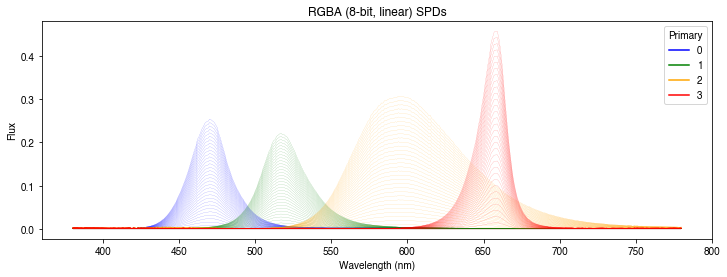

In [3]:
spd_fig = device.plot_spds()

Plot gamut of the device
------------------------

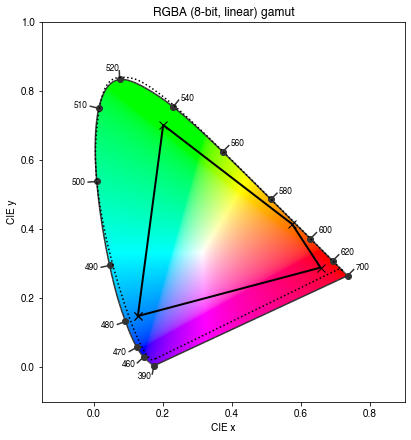

In [4]:
gamut_fig = device.plot_gamut()

Predict output for a specific primary at a given setting
--------------------------------------------------------

Uses interpolation function. This is the engine of all predicitons. 

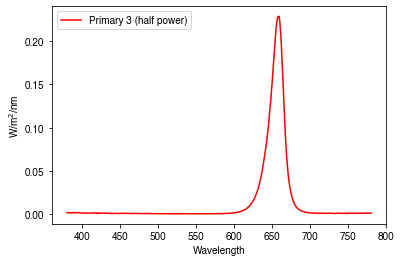

In [16]:
primary_spd = device.predict_primary_spd(
    primary=3, 
    setting=.5, 
    name='Primary 3 (half power)'
)
# plot primary spd?
primary_spd.plot(legend=True, ylabel='W/m$^2$/nm', color=device.colors[3]);

Predict multiprimary output
---------------------------

Predicted output for device settings: [0.5, 0.5, 0.5, 0.5]


Wavelength
380    0.005528
381    0.006206
382    0.005771
383    0.006024
384    0.004957
         ...   
776    0.004927
777    0.004805
778    0.004182
779    0.004609
780    0.005069
Name: Random SPD, Length: 401, dtype: float64

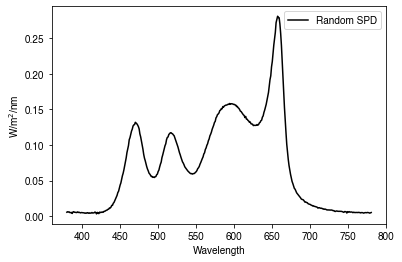

In [33]:
half_max = [.5, .5, .5, .5] #  We could also say [128, 128, 128, 128]
device_spd = device.predict_multiprimary_spd(half_max, 'Random SPD')
device_spd.plot(legend=True, ylabel='W/m$^2$/nm', color='k')
print(f'Predicted output for device settings: {half_max}')
device_spd

Predict *a*-opic irradiances for a list of device settings and plot with nice colours
--------------------------------------------------------------------------------------

S     1.822494
M     8.617252
L    11.326228
R     6.975350
I     5.790513
Name: 0, dtype: float64

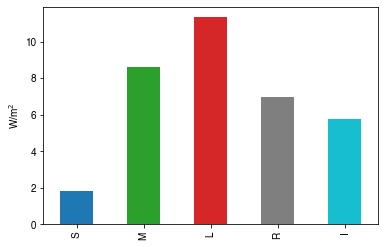

In [32]:
device_ao = device.predict_multiprimary_aopic(settings)
ao_colors = list(device.aopic_colors.values())
device_ao.plot(kind='bar', color=ao_colors, ylabel='W/m$^2$')
device_ao

Find a spectrum based on xy chromaticity coordinates and luminance
------------------------------------------------------------------

basinhopping step 0: f 4.61953e-07
basinhopping step 1: f 1.54193e-07 trial_f 1.54193e-07 accepted 1  lowest_f 1.54193e-07
found new global minimum on step 1 with function value 1.54193e-07
Requested LMS: [ 0.87374046  0.78105394  0.44556496]
Solution LMS: [ 0.87390469  0.78089385  0.4458837 ]


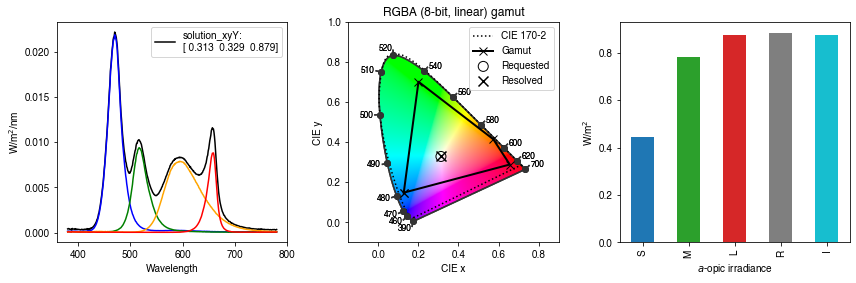

In [40]:
target_xy=[0.31271, 0.32902]  # D65
target_luminance=600.
bg = device.find_settings_xyY(target_xy, target_luminance)

References
----------

- Aguilar, M., & Stiles, W. S. (1954). Saturation of the rod mechanism of the retina at high levels of stimulation. Optica Acta: International Journal of Optics, 1(1), 59–65. https://doi.org/10.1080/713818657

- Cao, D., Nicandro, N., & Barrionuevo, P. A. (2015). A five-primary photostimulator suitable for studying intrinsically photosensitive retinal ganglion cell functions in humans. Journal of Vision, 15(1), 1–13. https://doi.org/10.1167/15.1.27

- Conus, V., & Geiser, M. (2020). A review of silent substitution devices for melanopsin stimulation in humans. Photonics, 7(4), 1–10. https://doi.org/10.3390/photonics7040121


- Geiser, M., Truffer, F., Balachandran, C., Kawasaki, A., & Agrici, S. (2019). Device for silent substitution excitation of melanopsin for human eye. June, 36. https://doi.org/10.1117/12.2511654

- Hexley, A. C., Özgür Yöntem, A., Spitschan, M., Smithson, H. E., & Mantiuk, R. (2020). Demonstrating a multi-primary high dynamic range display system for vision experiments. Journal of the Optical Society of America A, 37(4), A271. https://doi.org/10.1364/josaa.384022